# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
path_Y_train = "UCI HAR Dataset/train/Y_train.txt"
path_Y_test = "UCI HAR Dataset/test/Y_test.txt"
y_tr = pd.read_csv(path_Y_train, header=None,sep='\s+')
y_te = pd.read_csv(path_Y_test, header=None,sep='\s+')

In [20]:
y_tr.shape

(7352, 1)

In [24]:
# path_features = "UCI HAR Dataset/features.txt"
# path_subject_train = "UCI HAR Dataset/train/subject_train.txt"
# path_subject_test = "UCI HAR Dataset/test/subject_test.txt"
path_X_train = "UCI HAR Dataset/train/X_train.csv"
path_X_test = "UCI HAR Dataset/test/X_test.csv"


# features = pd.read_csv(path_features, sep=' ', header=None, usecols=[1])
# subject_train = pd.read_csv(path_subject_train, sep='\t', header=None)
# subject_test = pd.read_csv(path_subject_test, sep='\t', header=None)
X_tr = pd.read_csv(path_X_train)
X_te = pd.read_csv(path_X_test)



In [32]:
X_tr.shape


(7352, 563)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [35]:
X = X_tr
y = y_tr

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=80)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=65)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [69]:
clf = DecisionTreeClassifier(random_state=87, max_depth=4)
clf.fit(X_train, y_train)

# ccp_alphas, impurities = clf.ccp_alphas, clf.impurities


DecisionTreeClassifier(max_depth=4, random_state=87)

In [73]:
importances = clf.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01283314, 0.        , 0.        , 0.27445754,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1227018 , 0.        , 0.        , 0.     

In [78]:
df_importances = pd.DataFrame({'Feature': X.columns, 'Importances': importances})
df_sorted = df_importances.sort_values(by='Importances', ascending=False)
top_3_features  = df_sorted.head(3)
top_3_features

,Feature,Importances
54,tGravityAcc-min()-X,0.274458
85,tBodyAccJerk-std()-X,0.259600
561,"angle(Y,gravityMean)",0.168678


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [80]:
%%time
top_3_feature_names = top_3_features['Feature'].values
X_top3 = X[top_3_feature_names]

Wall time: 1 ms


In [84]:
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, test_size=.2, random_state=30)

In [87]:
%%time
clf_top3 = DecisionTreeClassifier(random_state=87, max_depth=4).cost_complexity_pruning_path(X_train_top3, y_train_top3)
ccp_alphas, impurities = clf_top3.ccp_alphas, clf_top3.impurities

Wall time: 8.52 ms


In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=878, ccp_alpha=ccp_alpha).fit(X_train_top3, y_train_top3)
    clfs.append(clf)

In [100]:
clfs

[DecisionTreeClassifier(random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.0012629298300565577, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.006635183438770814, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.012391659378300515, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.040928842108348795, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.043539913060857194, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.11012810628736834, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.16725779460775803, random_state=878),
 DecisionTreeClassifier(ccp_alpha=0.18637353279419655, random_state=878)]

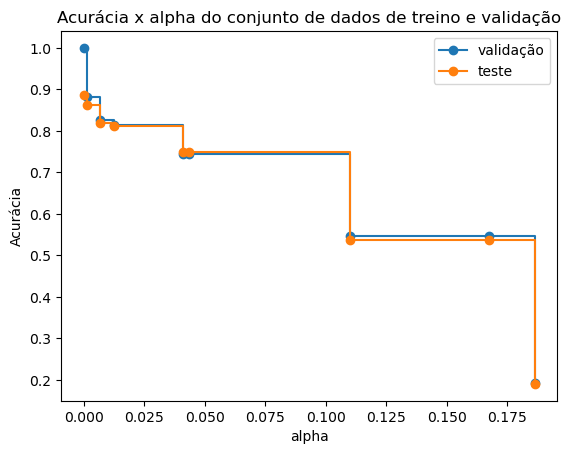

In [106]:
train_scores = [clf.score(X_train_top3, y_train_top3) for clf in clfs]
valid_scores = [clf.score(X_test_top3,y_test_top3) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 88.72


DecisionTreeClassifier(random_state=878)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 88.72


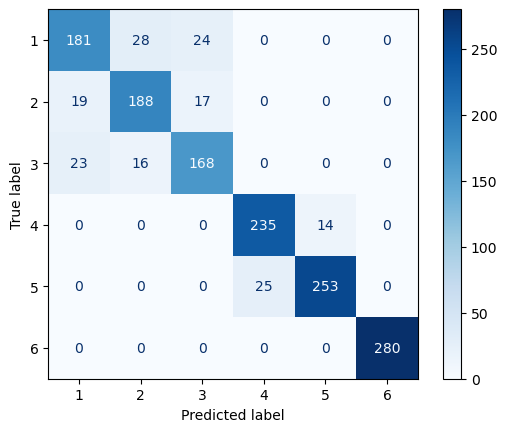

In [122]:
acuracia_teste = melhor_arvore.score(X_test_top3,y_test_top3)

print(f'Acurácia: {acuracia_teste*100:.2f}')
matriz_confusao = ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_top3,y_test_top3, cmap='Blues', values_format='.3g')
matriz_confusao

# ConfusionMatrixDisplay(melhor_arvore, X_test_top3,y_test_top3);

In [ ]:
# matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
# matriz_confusao